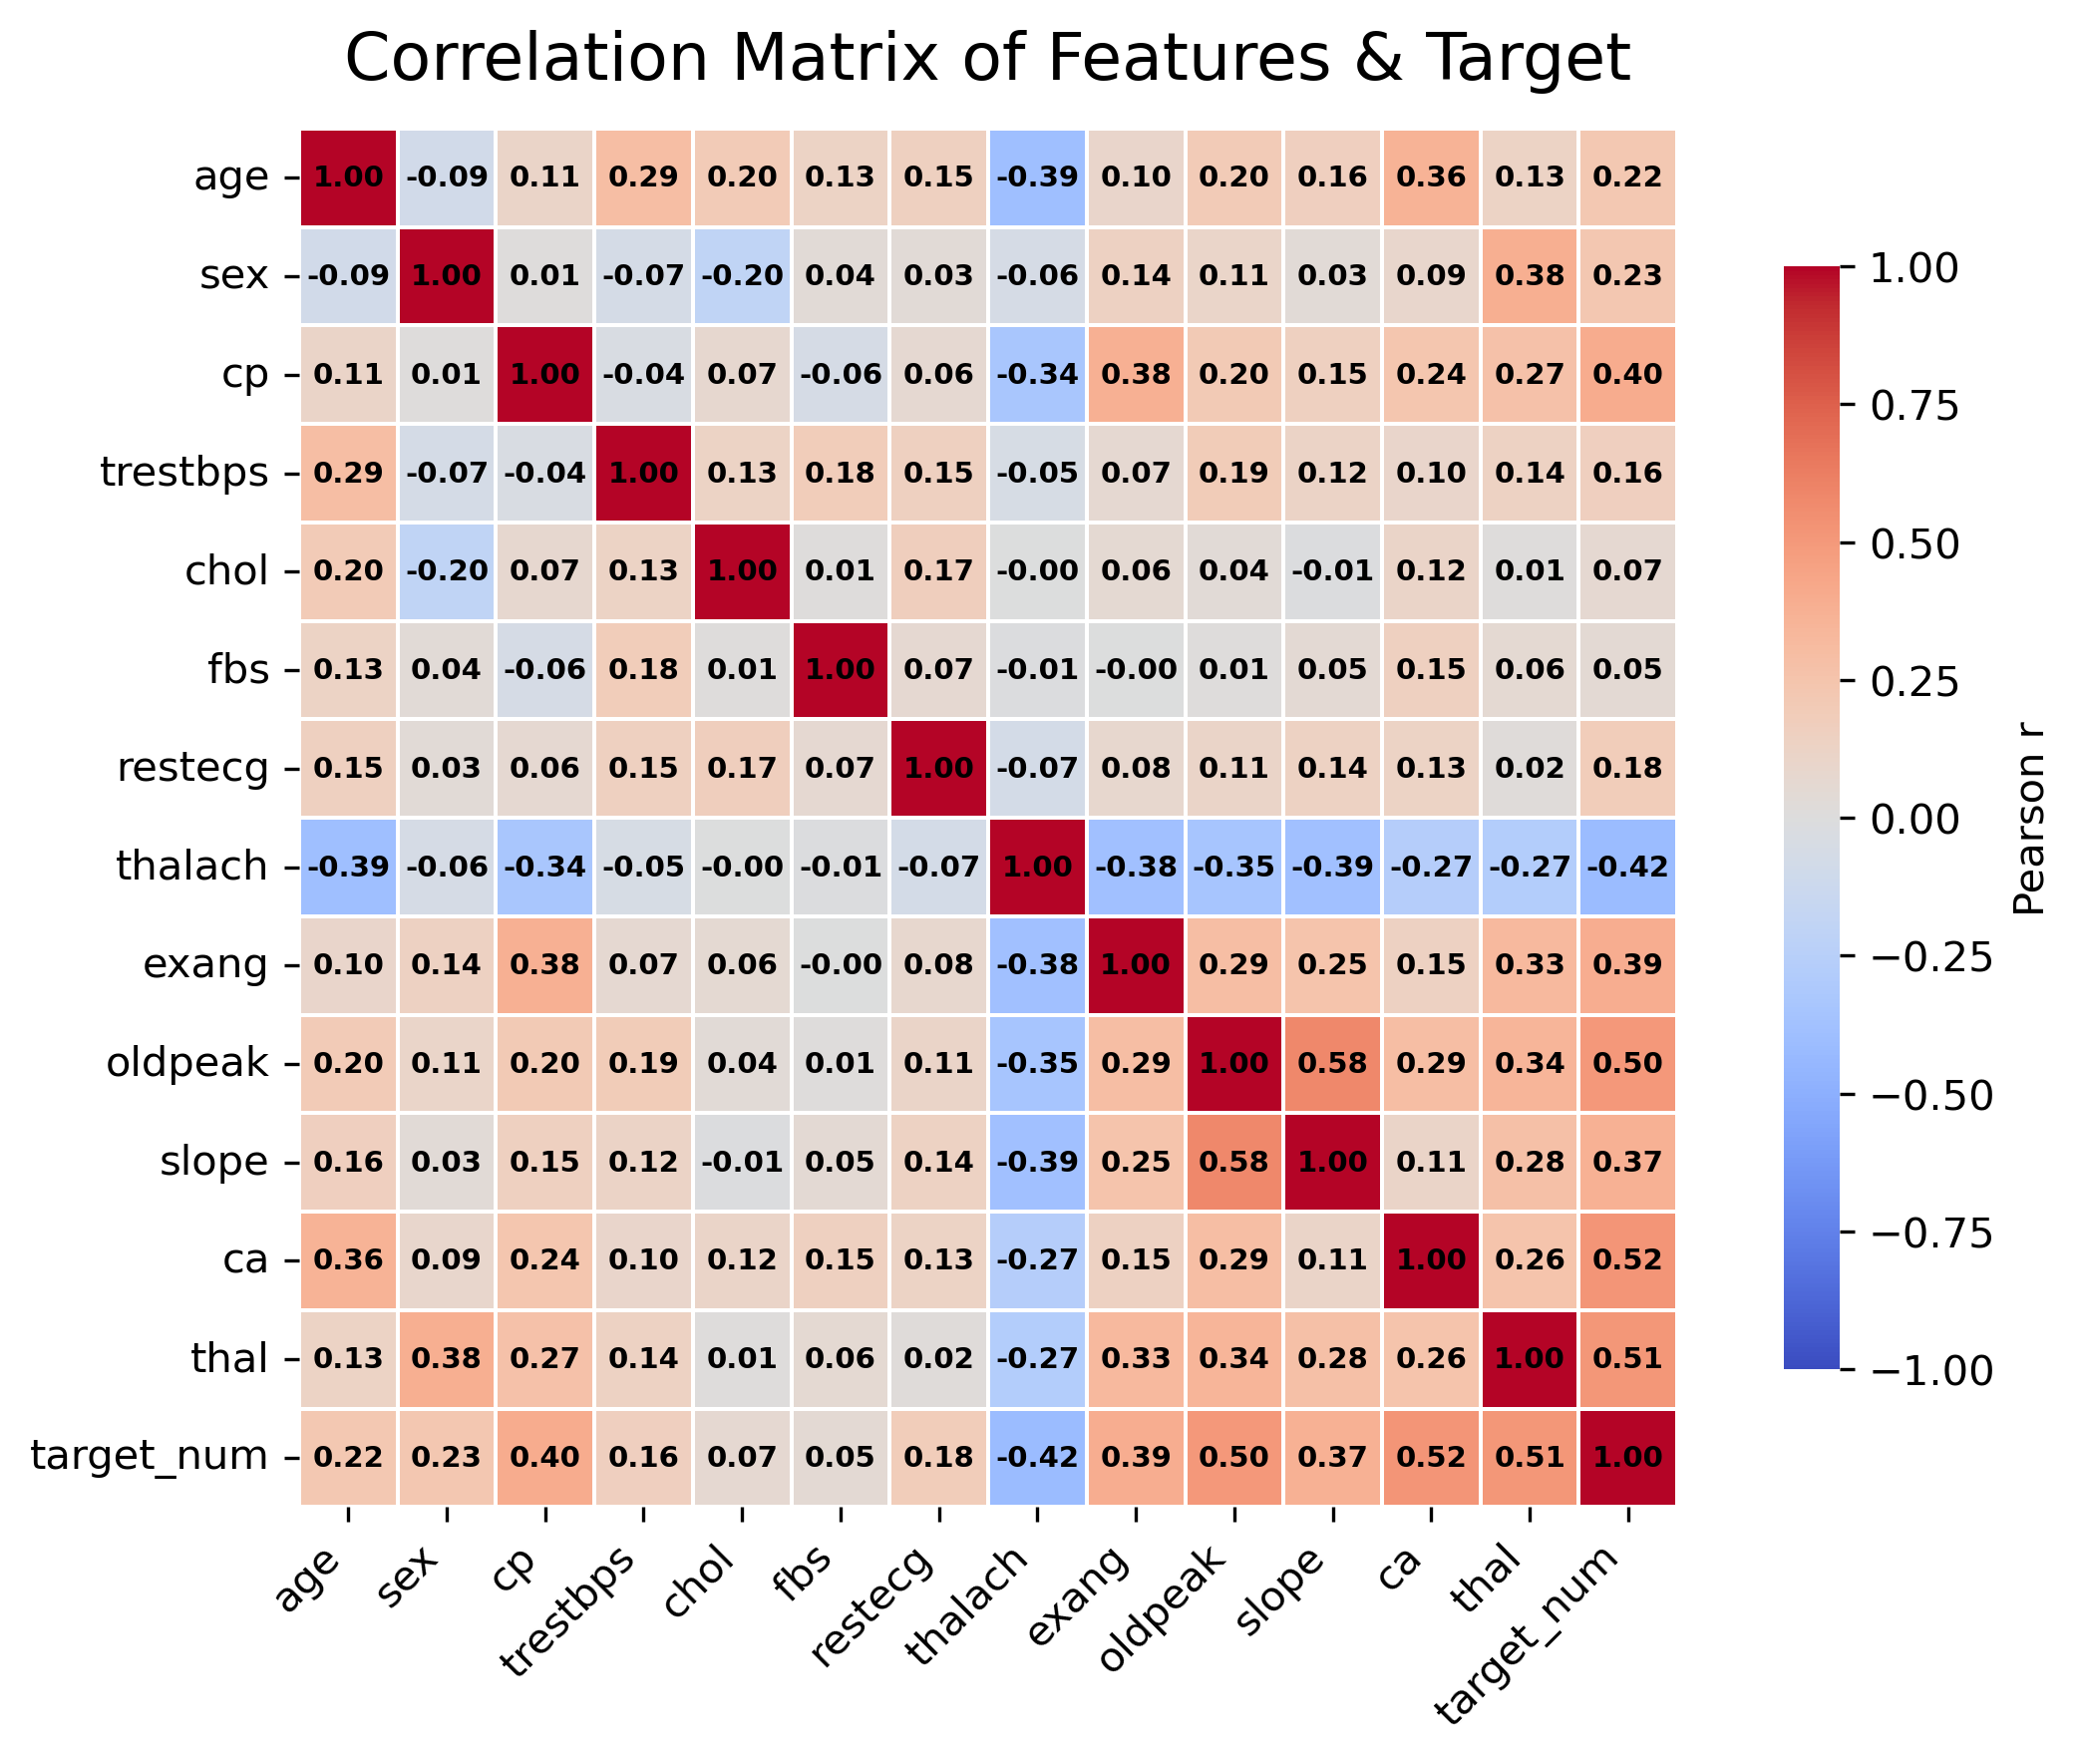

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# — Load & clean —
np.random.seed(42)
data = pd.read_csv('../processed.cleveland.data', header=None)
data.columns = [
    'age','sex','cp','trestbps','chol','fbs','restecg','thalach',
    'exang','oldpeak','slope','ca','thal','target'
]
data = data[~data.isin(['?']).any(axis=1)].copy()
for col in data.columns:
    data[col] = pd.to_numeric(data[col])
data['target_num'] = data['target'].astype(int)

# — Compute corr —
corr = data.drop(columns='target').corr()

# — Plot heatmap —
plt.figure(figsize=(8, 6), dpi=300)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1,
    cmap='coolwarm',
    cbar_kws={'shrink':0.8, 'label':'Pearson r'},
    square=True,
    linewidths=0.5,
    linecolor='white',
    annot=False        # turn off seaborn's annot, we'll add our own
)

# — Manually annotate each cell —
n = corr.shape[0]
for i in range(n):
    for j in range(n):
        val = corr.iloc[i, j]
        ax.text(
            j + 0.5, i + 0.5,    # center of each square
            f"{val:.2f}",
            ha='center', va='center',
            color='black',
            fontsize=7,
            weight='bold'
        )

# — Final styling —
ax.set_title('Correlation Matrix of Features & Target', fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# plt.savefig('corr_heatmap_annotated.png', dpi=300, facecolor='white')
plt.show()


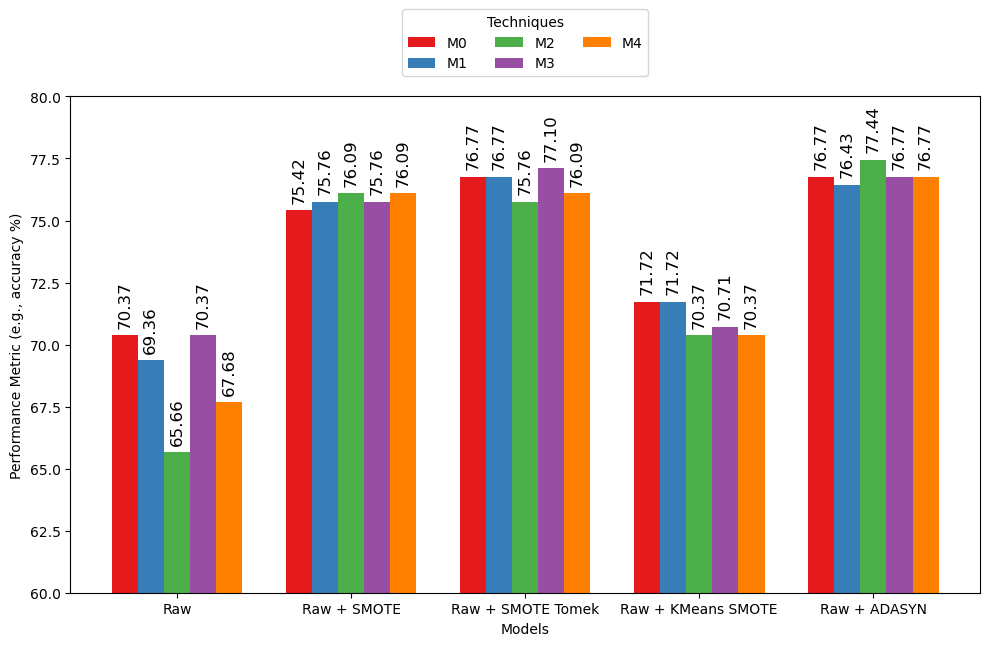

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Example data -----
models = [
    'Raw',
    'Raw + SMOTE',
    'Raw + SMOTE Tomek',
    'Raw + KMeans SMOTE', 
    'Raw + ADASYN'
]
techniques = [
    'M0',
    'M1',
    'M2',
    'M3',
    'M4'
]
# Random example values: shape (n_models, n_techniques)
data = np.array([
    [70.37037037037037, 69.36026936026936, 65.65656565656566, 70.37, 67.67676767676768],
    [75.42087542087542, 75.75757575757576, 76.09427609427609, 75.75757575757576, 76.09427609427609],
    [76.76767676767676, 76.76767676767676, 75.75757575757575, 77.10437710437711, 76.0942760942761],
    [71.71717171717171, 71.71717171717171, 70.37037037037037, 70.70707070707071, 70.37037037037037],
    [76.76767676767676, 76.43097643097643, 77.44107744107744, 76.76767676767676, 76.76767676767676]
])

# ----- Plot setup -----
x = np.arange(len(models))               # [0,1,2,3,4]
width = 0.15                             # width of each bar
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']  # one per technique

fig, ax = plt.subplots(figsize=(10, 7))

# Plot each technique as an offset bar and annotate values vertically
def add_value_labels(rects):
    """Attach a text label above each bar in *rects*, displaying its height vertically."""
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2,
            height+0.3,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            rotation=90,
            fontsize=12
        )

for i, (tech, color) in enumerate(zip(techniques, colors)):
    rects = ax.bar(
        x + i * width,
        data[:, i],
        width=width,
        label=tech,
        color=color
    )
    add_value_labels(rects)

# ----- Labels, ticks, legend -----
ax.set_xlabel('Models')
ax.set_ylabel('Performance Metric (e.g., accuracy %)')
# ax.set_title('Comparison of Techniques Across Models 🤓')
ax.set_xticks(x + width * 2)  # center tick under group
ax.set_xticklabels(models)
plt.ylim(bottom=60, top=80)
# Move legend to top of the plot
ax.legend(title='Techniques', loc='upper center', bbox_to_anchor=(0.5, 1.19), ncol=3)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


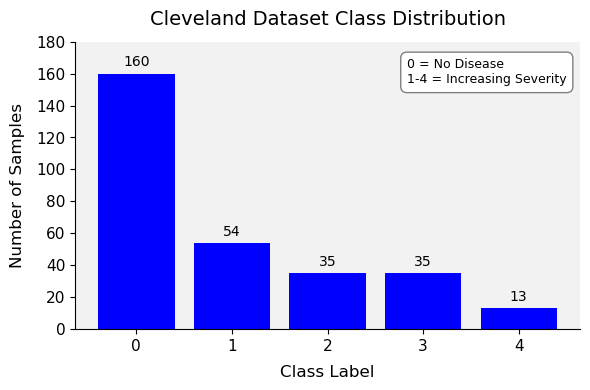

In [22]:
import matplotlib.pyplot as plt

# Class counts
classes = [0, 1, 2, 3, 4]
counts  = [160, 54, 35, 35, 13]

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

# Background colors
fig.patch.set_facecolor('white')
ax.set_facecolor('#f2f2f2')

# Plot bars
bars = ax.bar(classes, counts, linewidth=1.2, color='#0000FF', label='Class Samples')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Clean up spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Labels
ax.set_xlabel('Class Label', fontsize=12, labelpad=8)
ax.set_ylabel('Number of Samples', fontsize=12, labelpad=8)
ax.set_title('Cleveland Dataset Class Distribution', fontsize=14, pad=12)

# Ticks
ax.set_xticks(classes)
ax.set_xticklabels(classes, fontsize=11)
ax.tick_params(axis='y', labelsize=11)
plt.ylim(0,180)

ax.text(4.5, max(counts)*0.95, "0 = No Disease\n1-4 = Increasing Severity",
         fontsize=9, va='bottom', ha='right',
         multialignment='left',
         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
# Layout
plt.tight_layout()
plt.show()
